<div style="text-align:right; font-weight:bold;">
    Laurian Duma - s1091563<br>
    Alexandru Aioanei - S1103357<br>
    Group: PR-119
</div>

<div style="text-align:center">
    <h1>Data Mining Project</h1>
</div>


<div style="text-align:center">
    <h1>Fire alarm activation system</h1>
</div>


<div> <h2> Introduction </h2> </div>

This Jupyter Notebook is a demonstration of how we applied data mining techniques to a real-world problem and gained insights from the data. In this notebook, we will show you the following steps:

**Data Exploration:**
How we explored the dataset using descriptive statistics and visualization techniques, such as histograms, boxplots, and heatmaps, to understand the distribution and relationships of the variables.

**Data Preprocessing:**
How we cleaned and transformed the dataset for our analysis, such as handling missing values, scaling and standardizing numerical variables, and reducing dimensionality using PCA.

**Data Modeling:**
How we applied different classification algorithms to our data, such as a CatBoost classifier and a MultiLayer Perceptron classifier.

**Data Evaluation:**
How we evaluated the performance and accuracy of our models using different metrics, such as accuracy, F1-score, precision, recall, and AUC, and compared them with each other.

**Data Interpretation:**
How we interpreted the results and gained insights of our project such as the limitations and challenges of our methods.


As we already mentioned in the Research Proposal, the dataset that we chose is the Smoke Detection Dataset from Kaggle, which contains various environmental parameters such as temperature, humidity, TVOC, eCO2, pressure, and PM levels. It can be found at the following URL address: [Smoke Detection Dataset](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/data). The main features that we use are TVOC, eCO2, and PM levels, as they are related to the presence of smoke and fire.

By using this dataset and features, we aim to explore new aspects of fire hazard prediction and reveal new insights into the performance and effectiveness of fire alarm systems using machine learning techniques. In addition, this dataset has a bit more than 62,000 objects and 16 features.


As it is important to understand the meaning of every feature that is present in our dataset, we make use of the following feature description:

- **UTC:** The time when the experiment was performed.
- **Temperature:** Temperature of the surroundings. Measured in Celsius.
- **Humidity:** The air humidity during the experiment.
- **TVOC:** Total Volatile Organic Compounds. Measured in ppb (parts per billion).
- **eCO2:** CO2 equivalent concentration. Measured in ppm (parts per million).
- **Raw H2:** The amount of Raw Hydrogen present in the surroundings.
- **Raw Ethanol:** The amount of Raw Ethanol present in the surroundings.
- **Pressure:** Air pressure. Measured in hPa.
- **PM1.0:** Particulate matter of diameter less than 1.0 micrometer.
- **PM2.5:** Particulate matter of diameter less than 2.5 micrometers.
- **NC0.5:** Concentration of particulate matter of diameter less than 0.5 micrometers.
- **NC1.0:** Concentration of particulate matter of diameter less than 1.0 micrometers.
- **NC2.5:** Concentration of particulate matter of diameter less than 2.5 micrometers.
- **CNT:** Simple Count.
- **Fire Alarm:** (Reality) If fire was present then the value is 1, else it is 0.


Before we dive into the steps defined at the beginning of this Jupyter Notebook, it's crucial to ensure that the required libraries are available and installed on our machine or environment. Since we'll be working with CatBoost classifiers, an ensemble of decision trees, we'll begin by confirming the availability of the necessary package.

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


The provided code snippet simplifies the use of various Python libraries and modules in our project through a series of import statements. This organized approach ensures modularity and ease of modification when necessary.

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cat
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, make_scorer, auc, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import skew, yeojohnson
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.decomposition import PCA
from joblib import Parallel, delayed
from statsmodels.stats.contingency_tables import mcnemar


ModuleNotFoundError: No module named 'statsmodels'

We begin by loading the 'smoke_detection_iot.csv' dataset into a Pandas DataFrame using the `pd.read_csv` function. Subsequently, we print descriptive statistics of the dataset, providing key insights into its central tendencies and distribution. Additionally, the code outputs the shape of the dataset, indicating the number of rows and columns. This initial exploration serves as a crucial step in understanding the nature and structure of the dataset before proceeding with further analysis or modeling.


In [3]:
dataframe = pd.read_csv("smoke_detection_iot.csv")

print(dataframe.describe(), '\n')
print("The shape of our dataset is: {}".format(dataframe.shape))

         Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1905.885439    272.464

The provided summary statistics offer valuable insights into the nature of our dataset's features. Notably, it becomes evident that these features exhibit varying scales. This variation in feature scales can have a profound impact on the performance of the machine learning algorithms that we will use later on.

<h2>Data Exploration</h2>

Before starting with applying data preprocessing techinques, it is a good practice to first analyse the raw dataset and gain some insights about the characteristics of its features. 
We will first check whether there exist any missing or duplicate values in our dataset since it is important to handle these situations correctly. 
Apparently there are none of them, so no further actions will be taken regarding this.

In [4]:
null_values = dataframe.isnull().sum()
duplicates = dataframe[dataframe.duplicated()]

print(null_values, '\n')
print("The number of duplicates in our data frame is: {}".format(duplicates.shape[0]))

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64 

The number of duplicates in our data frame is: 0


While not part of the initial data exploration step, feature selection plays a pivotal role in enhancing the efficiency and effectiveness of the machine learning algorithms we will employ in our subsequent analysis. By eliminating irrelevant or redundant features, we can increase the efficiency of the the model and reduce computational complexity.

In this context, we identified certain features that are less relevant or entirely irrelevant to our data mining algorithms. For instance, attributes like UTC and CNT are not expected to contribute meaningfully to our predictive models. Therefore, we have opted to remove these columns from the dataset. Additionally, the column labeled "Unnamed" serves the sole purpose of indexing objects within the dataset and does not provide valuable information for our analysis, making it another candidate for removal.

In [5]:
dataframe = dataframe.drop(columns = 'UTC')
dataframe = dataframe.drop(columns = 'CNT')
dataframe = dataframe.drop(columns = 'Unnamed: 0')

print(dataframe.head())

   Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0          20.000        57.36          0        400   12306        18520   
1          20.015        56.67          0        400   12345        18651   
2          20.029        55.96          0        400   12374        18764   
3          20.044        55.28          0        400   12390        18849   
4          20.059        54.69          0        400   12403        18921   

   Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
0        939.735    0.0    0.0    0.0    0.0    0.0           0  
1        939.744    0.0    0.0    0.0    0.0    0.0           0  
2        939.738    0.0    0.0    0.0    0.0    0.0           0  
3        939.736    0.0    0.0    0.0    0.0    0.0           0  
4        939.744    0.0    0.0    0.0    0.0    0.0           0  


In addition to generating histograms that visually depict the data spread for each feature, we made a deliberate choice to exclude constructing a histogram for the 'Fire Alarm' class variable due to its binary nature (comprising values 0 or 1).

Several variables, including PM1.0, PM2.5, NC0.5, NC1.0, and NC2.5, exhibit right-skewed distributions. This indicates a concentration of lower values with fewer occurrences of higher values, signifying that extreme high readings are relatively infrequent. This skewness has the potential to impact the performance of specific algorithms, prompting the need for further consideration.

Turning our attention to the range of values, Raw H2 and Raw Ethanol attributes showcase a broader span compared to the particulate matter and NC variables. This suggests a moderate spread within these features, hinting at the possibility of diverse information that could be valuable for our predictive models.

Furthermore, the resemblances in distribution patterns observed among the particulate matter (PM) and number concentration (NC) variables, raise the possibility of underlying correlations. Our next step regarding this possible correlation involves conducting a thorough correlation analysis to quantitatively evaluate the relationships between these features.

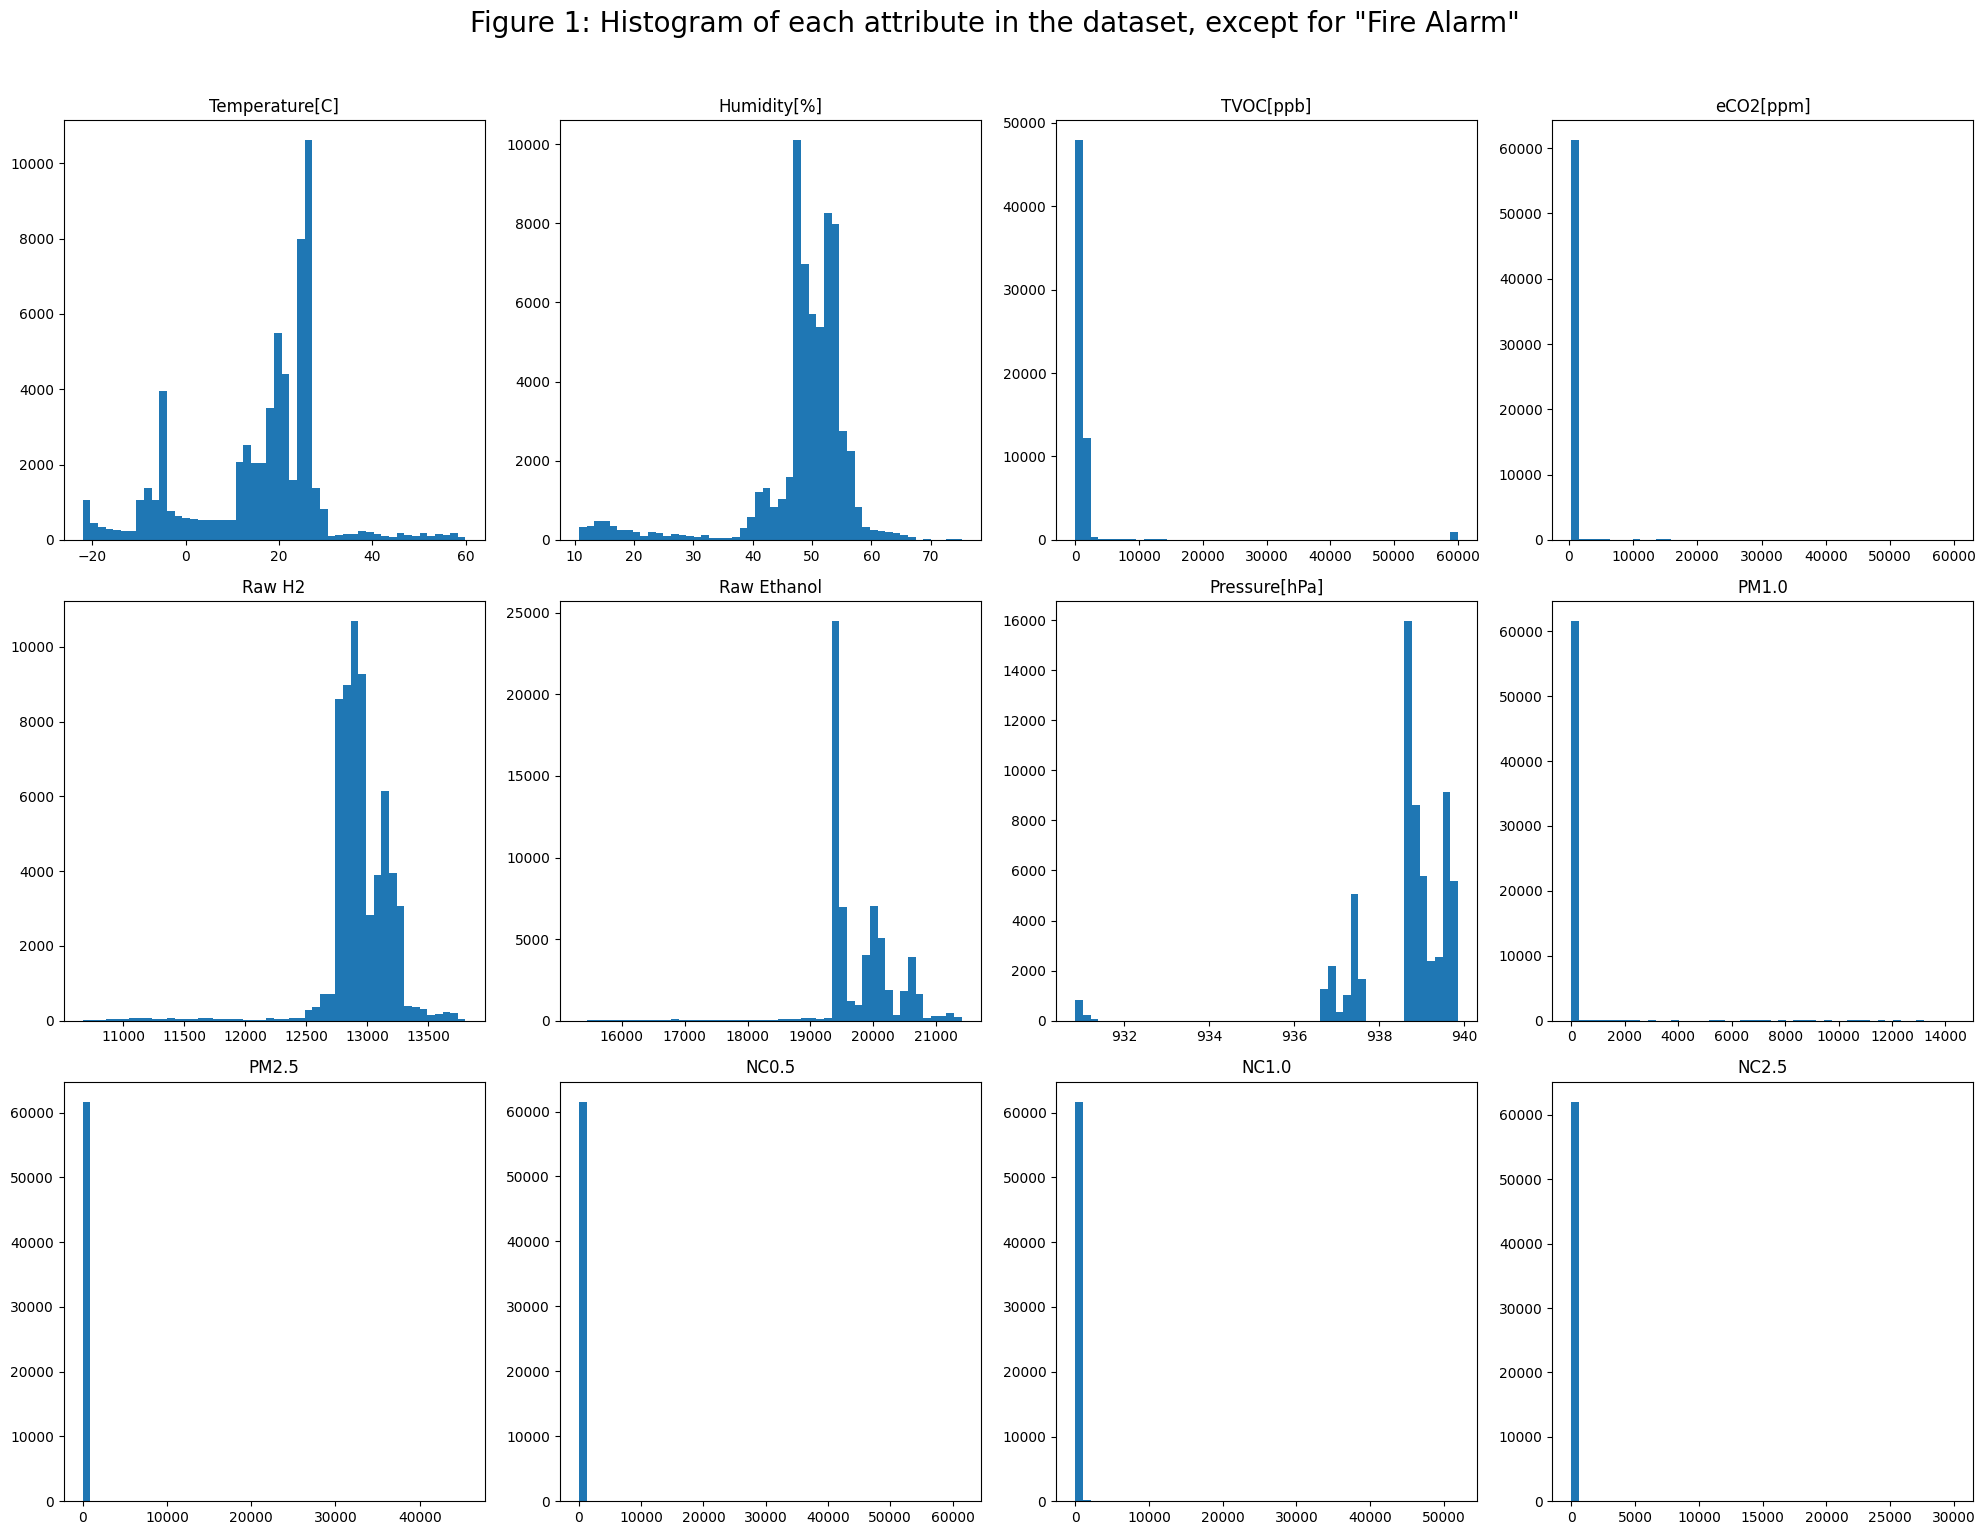

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, column in enumerate(dataframe.columns[:12]):
    ax = axes[i // 4, i % 4]
    ax.hist(dataframe[column], bins=50)
    ax.set_title(column)

plt.suptitle('Figure 1: Histogram of each attribute in the dataset, except for "Fire Alarm"', y=1.02, size=20)
plt.tight_layout()
plt.show()

We know that many classification algorithms are sensitive to outliers, so we first want to determine whether there exist any of them for each specific feature. To do this, we have generated a box plot for each attribute, omitting "Fire Alarm" as it is our categorical target variable.

Upon examination of the box plots for our features, we observed the following:

- **Temperature and Humidity:** These features show a fairly standard distribution with outliers not being prominent, which suggests that for the most part, the data for these attributes is consistent and may not require outlier treatment.

- **TVOC and eCO2:** The presence of significant outliers in the TVOC and eCO2 attributes indicates that these sensors occasionally record extraordinarily high values.

- **Raw H2 and Raw Ethanol:** The box plots for Raw H2 and Raw Ethanol sensors indicate a concentration of values near the median with few extreme values.

- **Pressure:** Pressure readings are quite stable with minimal variation, as seen by the tight box plot. There are some outliers, but given the nature of pressure in an enclosed environment, it is likely that these represent natural fluctuations rather than errors.

- **Particulate Matter and Number Concentration of Particulate Matter (PM1.0, PM2.5, NC0.5, NC1.0, NC2.5):** These sensors show a significant number of high-value outliers. Given that these sensors measure particulate matter, which can vary greatly in a short amount of time (e.g., during a fire), these outliers may be crucial for the prediction of fire events.

Although many box plots display a considerable number of potential outliers, we primarily consider these as being extreme values within the normal operational range for these specific parameters, rather than as inaccuracies or sensor malfunctions. This interpretation is based on the understanding that the dataset captures conditions where rapid changes in sensor readings are to be expected, such as in fire detection scenarios. Hence, rather than removing these values, we will further investigate their relevance to the predictive modeling task at hand and ensure that our algorithms are robust to such extremes, either by choosing appropriate models or by applying transformations that can mitigate the influence of outliers without discarding valuable information.


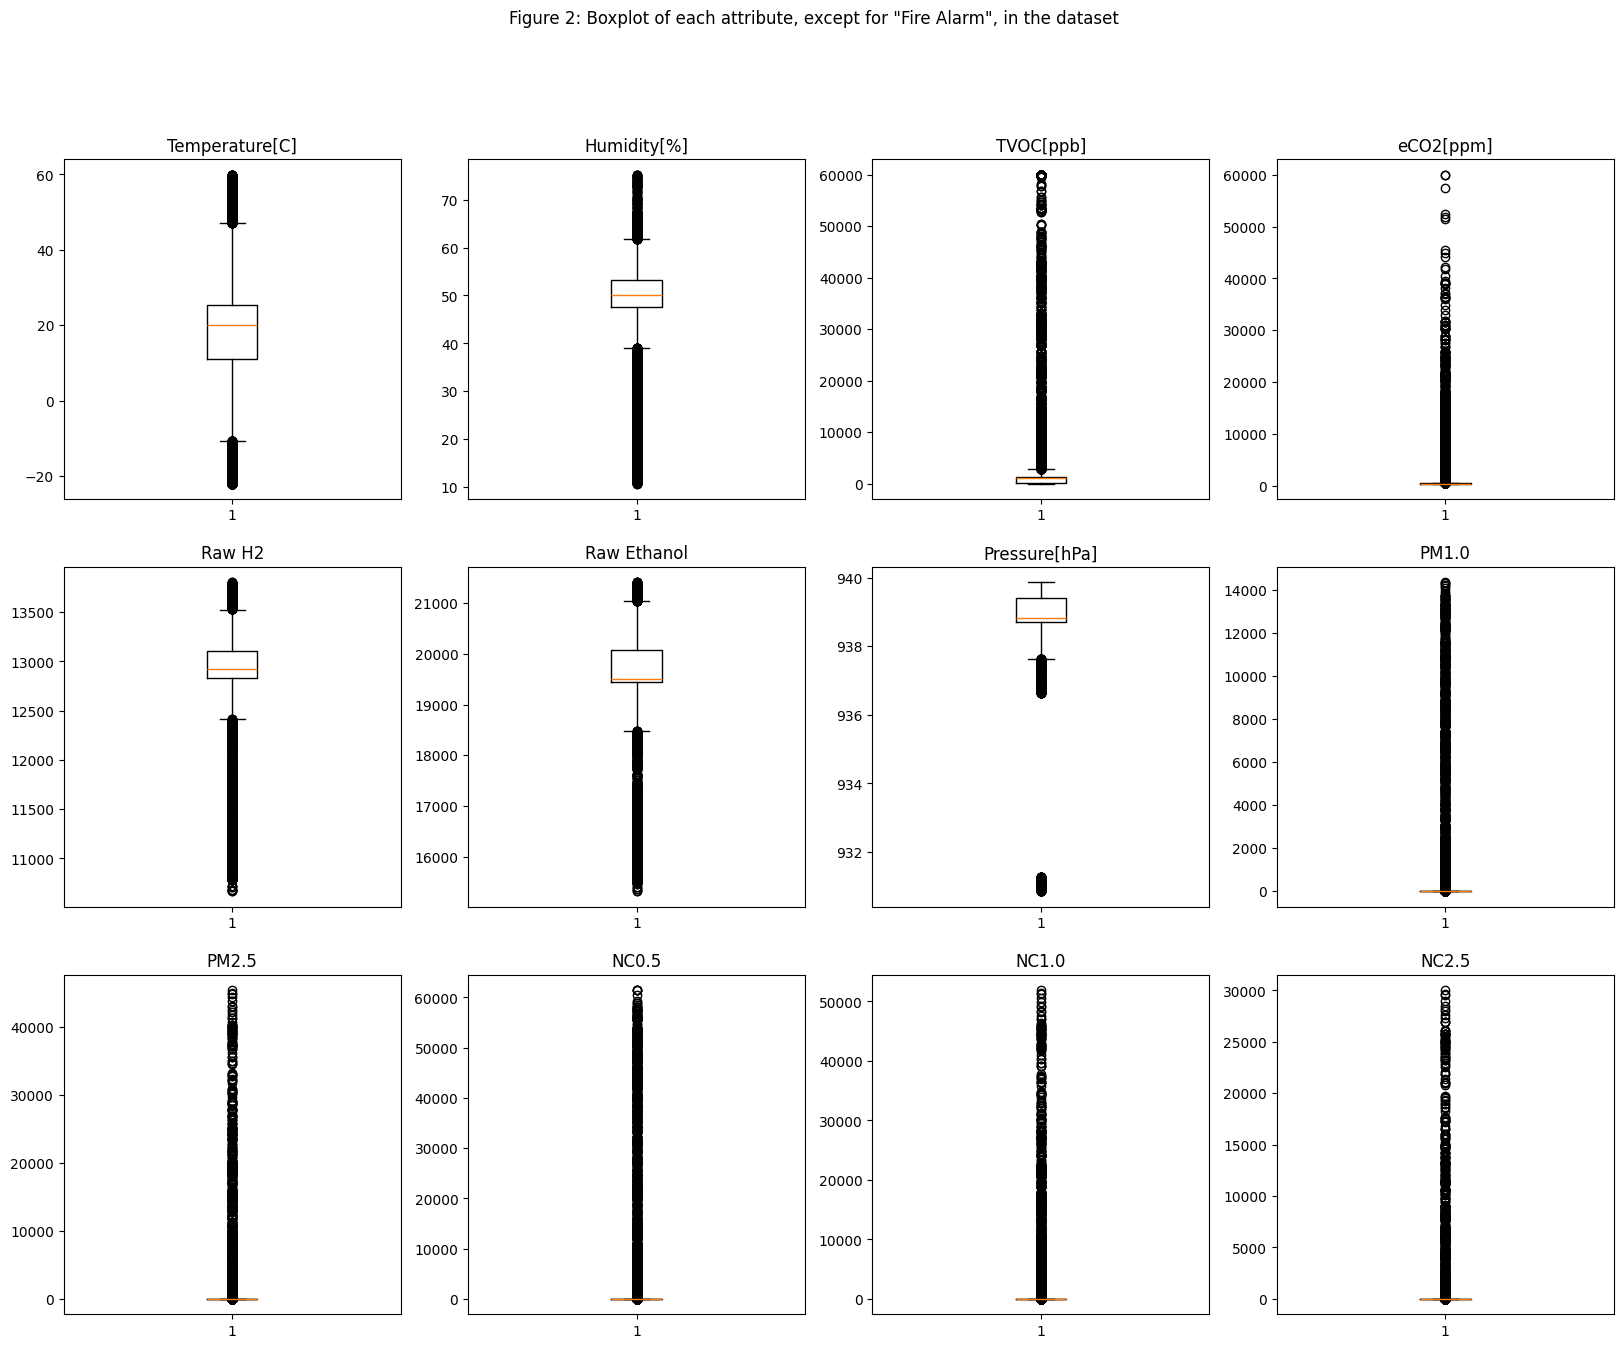

In [7]:
columns_to_plot = [col for col in dataframe.columns if col != 'Fire Alarm']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, column in enumerate(columns_to_plot):
    ax = axes[i//4, i%4]
    ax.boxplot(dataframe[column])
    ax.set_title(column)

plt.suptitle('Figure 2: Boxplot of each attribute, except for "Fire Alarm", in the dataset')
plt.show()

Examination of the correlation heatmap reveals pronounced positive correlations among particulate matter and number concentration metrics, such as PM1.0, PM2.5, NC0.5, NC1.0, and NC2.5. These strong correlations suggest a significant overlap in the information these variables capture, indicating redundancy. When highly correlated features are included in classification models, the risk of overfitting escalates, potentially damaging the model's ability to generalize to unseen data. To address this, we plan to engage in feature selection, aiming to reduce redundancy without sacrificing valuable information.

In addition, the heatmap has highlighted a subset of features, including Raw H2, TVOC, and eCO2, which show modest correlations with other variables. Despite their lower correlation coefficients, these features could contribute unique insights or non-linear patterns relevant to our classification goals. It is important to note that such features may enhance model performance when combined with other predictors, even if their individual linear correlations are weak.

In [8]:
corr = dataframe.corr()

plt.figure(figsize=(15,8))
sns.heatmap(
    data=corr,
    annot=True,
)

plt.title("Figure 3: Correlation heatmap for our data frame")
plt.show()

NameError: name 'sns' is not defined

<Figure size 1500x800 with 0 Axes>

As we can notice in the following plot, one value of the Fire Alarm variable is very rare, while the other one is very frequent. This is a case of class imbalance, which can affect the quality and accuracy of a machine learning model. In our case, there are two times more data objects where the fire alarm went off compared to those where it did not.

In [9]:
sns.catplot(
    data=dataframe,
    x='Fire Alarm',
    kind='count'
)
plt.title("Figure 4: Class lables distribution")
plt.show()

NameError: name 'sns' is not defined

Upon calculating the skewness for each variable, we've confirmed our hypothesis that certain variables in our dataset exhibit skewed distributions. Specifically, variables like Humidity[%], Raw H2, Raw Ethanol, and Pressure[hPa] show a significant leftward skew, suggesting a concentration of higher values with fewer low-value outliers. Conversely, measures of air quality, such as TVOC[ppb], eCO2[ppm], and particulate matter readings (PM1.0, PM2.5, NC0.5, NC1.0, and NC2.5), show an extreme rightward skew, indicating the presence of high-value outliers.  The distribution of these variables will be taken into account when selecting and tuning our machine learning models, as highly skewed features can influence the performance of many algorithms.

In [10]:
print("Skewness of each variable", '\n')
for column in columns_to_plot:
    skewness = skew(dataframe[column])
    print(f"{column}: {skewness:.2f}")

Skewness of each variable 

Temperature[C]: -0.62
Humidity[%]: -2.46
TVOC[ppb]: 6.78
eCO2[ppm]: 12.46
Raw H2: -2.91
Raw Ethanol: -1.68
Pressure[hPa]: -3.60
PM1.0: 10.75
PM2.5: 14.15
NC0.5: 10.04
NC1.0: 14.45
NC2.5: 17.74


<h2>Data Pre-Processing</h2>

   Since some of the data mining algorithms that we are going to apply on this dataset are sensitive to the actual magnitude of its attributes, normalization of data is necessary, while for others, standardization or scaling is necessary. By standardizing our data, it will have a normal distribution and reduce the effect of outliers. In addition, our data will also have 0 mean and unit variance. On the other hand, there are many algorithms which perform better on normalized data. By applying normalization, we limit the values of every attribute to a range between 0 and 1. Since the actual values of all the features are numerical, both standardization and normalization can be easily applied. We will both standardize and normalize our dataset and check at the end how the classifiers perform on the transformed and raw data.

In [11]:
dataframe.columns = dataframe.columns.str.strip() 

fire_alarm_column = dataframe['Fire Alarm']
df_temp = dataframe.drop(columns=['Fire Alarm'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_temp)

standardized_df = pd.DataFrame(scaled_data, columns=df_temp.columns)
standardized_df['Fire Alarm'] = fire_alarm_column

print(standardized_df.head())

   Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  Raw Ethanol  \
0        0.280622     0.994947  -0.248614  -0.141679 -2.335935    -2.025006   
1        0.281666     0.917115  -0.248614  -0.141679 -2.192796    -1.810079   
2        0.282641     0.837028  -0.248614  -0.141679 -2.086359    -1.624683   
3        0.283686     0.760324  -0.248614  -0.141679 -2.027636    -1.485227   
4        0.284730     0.693773  -0.248614  -0.141679 -1.979923    -1.367099   

   Pressure[hPa]     PM1.0    PM2.5     NC0.5     NC1.0     NC2.5  Fire Alarm  
0       0.831761 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889           0  
1       0.838521 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889           0  
2       0.834014 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889           0  
3       0.832512 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889           0  
4       0.838521 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889           0  


In [12]:
df_temp = dataframe.drop(columns=['Fire Alarm'])

normalized_data = normalize(df_temp, axis=0)
normalized_df = pd.DataFrame(normalized_data, columns=df_temp.columns)
normalized_df['Fire Alarm'] = fire_alarm_column

print(normalized_df.head())

   Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  Raw Ethanol  \
0        0.003721     0.004645        0.0   0.000791  0.003799     0.003744   
1        0.003724     0.004589        0.0   0.000791  0.003811     0.003771   
2        0.003726     0.004532        0.0   0.000791  0.003819     0.003794   
3        0.003729     0.004477        0.0   0.000791  0.003824     0.003811   
4        0.003732     0.004429        0.0   0.000791  0.003828     0.003825   

   Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
0       0.004001    0.0    0.0    0.0    0.0    0.0           0  
1       0.004001    0.0    0.0    0.0    0.0    0.0           0  
2       0.004001    0.0    0.0    0.0    0.0    0.0           0  
3       0.004001    0.0    0.0    0.0    0.0    0.0           0  
4       0.004001    0.0    0.0    0.0    0.0    0.0           0  


In our specific case, we have applied PCA to reduce the dimensionality of the dataset from five highly correlated particulate matter and number concentration attributes to just two principal components, which we refer to as 'PCA1' and 'PCA2.' The plot below illustrates these components as axes in a two-dimensional space, where each point represents a single observation from the dataset. The color intensity represents the target variable, providing a visual indication of how the target variable is distributed across these two new dimensions.

The first principal component, 'PCA1', accounts for approximately 91% of the variance within our original attributes, indicating that it captures most of the information conveyed by the five original features. The second principal component, 'PCA2', explains an additional 8.9%, bringing the total variance captured by the two components to roughly 100% (99% more exactly). This high percentage suggests that 'PCA1' and 'PCA2' together retain almost all the information that was spread across the original attributes.

From the scatter plot which corresponds to the standardized dataframe, we observe a gradient of the target variable across the PCA dimensions, which may indicate patterns that are pertinent to predicting our target. Specifically, we can see that observations with similar target values are clustered together in this reduced feature space. This pattern suggests that the PCA components could be good predictors for the target variable, potentially enhancing the performance of our classification algorithms.

Moreover, by reducing the feature space, we not only intend to minimize the risk of overfitting, but also reduce the computational complexity, making our models more efficient. The reduced dataset is likely to generalize better to new, unseen data, as it encapsulates the most significant variance in fewer dimensions.

It's important to note that while PCA helps in overcoming multicollinearity among features and may improve the model's performance, the interpretability of the features is reduced. The components 'PCA1' and 'PCA2' are linear combinations of the original features and do not have a physical meaning on their own.

Explained variance by components: [0.91086578 0.08913422]


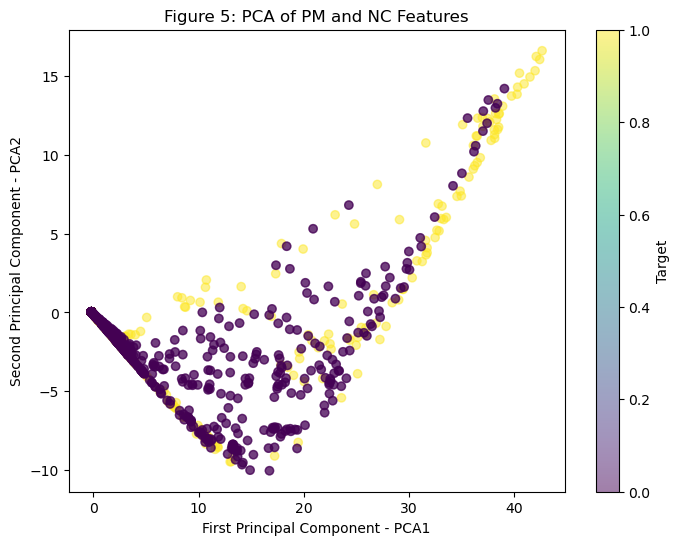

In [13]:
features_for_pca = ['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']

X = standardized_df[features_for_pca]
X_1 = dataframe[features_for_pca]
X_2 = normalized_df[features_for_pca]

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
X_pca_1 = pca.fit_transform(X_1)
X_pca_2 = pca.fit_transform(X_2)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df_1 = pd.DataFrame(X_pca_1, columns=['PCA1', 'PCA2'])
pca_df_2 = pd.DataFrame(X_pca_2, columns=['PCA1', 'PCA2'])

standardized_df_pca = pd.concat([standardized_df, pca_df], axis=1)
standardized_df_pca.drop(columns=features_for_pca, inplace=True)
dataframe_pca = pd.concat([dataframe, pca_df_1], axis=1)
dataframe_pca.drop(columns=features_for_pca, inplace=True)
normalized_df_pca = pd.concat([normalized_df, pca_df_2], axis=1)
normalized_df_pca.drop(columns=features_for_pca, inplace=True)

print(f"Explained variance by components: {pca.explained_variance_ratio_}")

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=standardized_df_pca['Fire Alarm'], cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component - PCA1')
plt.ylabel('Second Principal Component - PCA2')
plt.colorbar(label='Target')
plt.title('Figure 5: PCA of PM and NC Features')
plt.show()

We tackled the issue of skewness in the distribution of several features. In our example, we have chosen a more conservative range of [-4, 4] as the interval for normal skewness, based on our domain knowledge and exploratory data analysis. We have decided to only transform the features that have skewness outside this interval, as we consider them to be extremely skewed and potentially problematic for our predictive modeling. We have also decided to leave the features that have skewness within this interval unchanged, as we consider them to be sufficiently normal and not likely to affect our predictive modeling.

For positively skewed features such as 'TVOC[ppb]', 'eCO2[ppm]', and 'PCA1', which had skewness values of 6.78, 12.46, and 12.48 respectively, we applied a log transformation. This approach helps in reducing the impact of extreme high values, pulling in the long tail on the right side of the distribution. As seen in the histograms, the log transformation has successfully reduced the skewness, though the distributions still show a positive skew. This indicates an improvement, but also suggests that further normalization techniques may be warranted to bring the skewness closer to our chosen "normal interval".

For features with negative skewness, we would consider a different approach, such as applying a square transformation, but since none of the features exhibited such extreme negative skewness by our criteria, no transformation was required.

The histograms provide a visual confirmation of the efficacy of the log transformation in reducing skewness. The transformed features now have a distribution that, while not perfectly normal with respect to our chosen interval, is significantly less skewed and more suitable for the assumptions of our subsequent predictive modeling.

In [14]:
print("Skewness of each variable", '\n')
for column in standardized_df_pca.columns:
    skewness = skew(standardized_df_pca[column])
    print(f"{column}: {skewness:.2f}")

Skewness of each variable 

Temperature[C]: -0.62
Humidity[%]: -2.46
TVOC[ppb]: 6.78
eCO2[ppm]: 12.46
Raw H2: -2.91
Raw Ethanol: -1.68
Pressure[hPa]: -3.60
Fire Alarm: -0.95
PCA1: 12.48
PCA2: 0.39


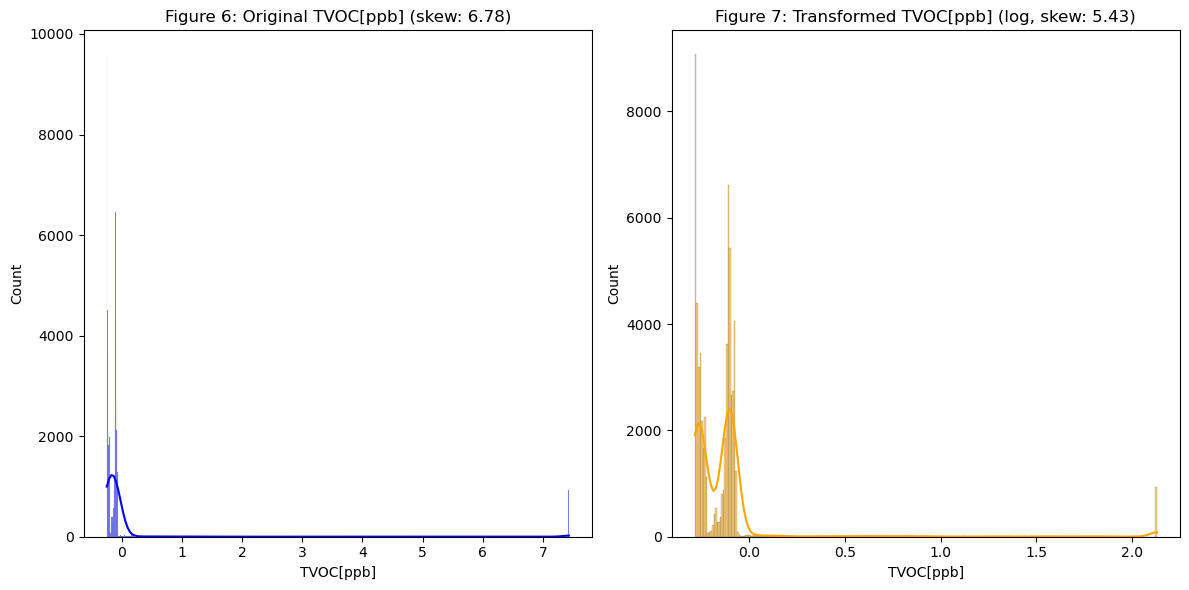

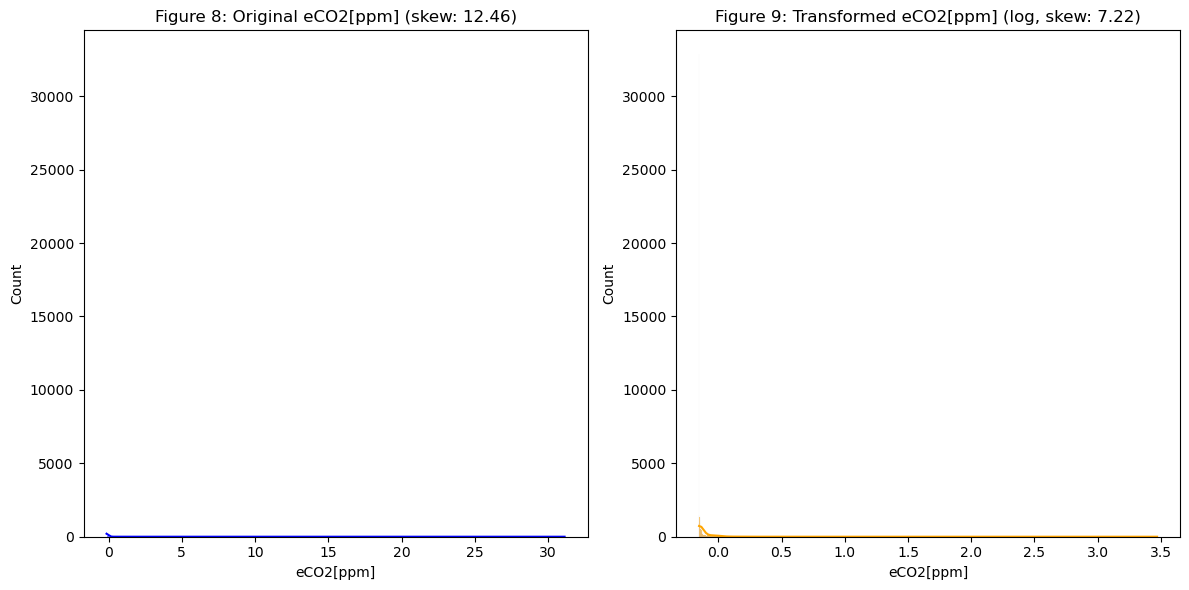

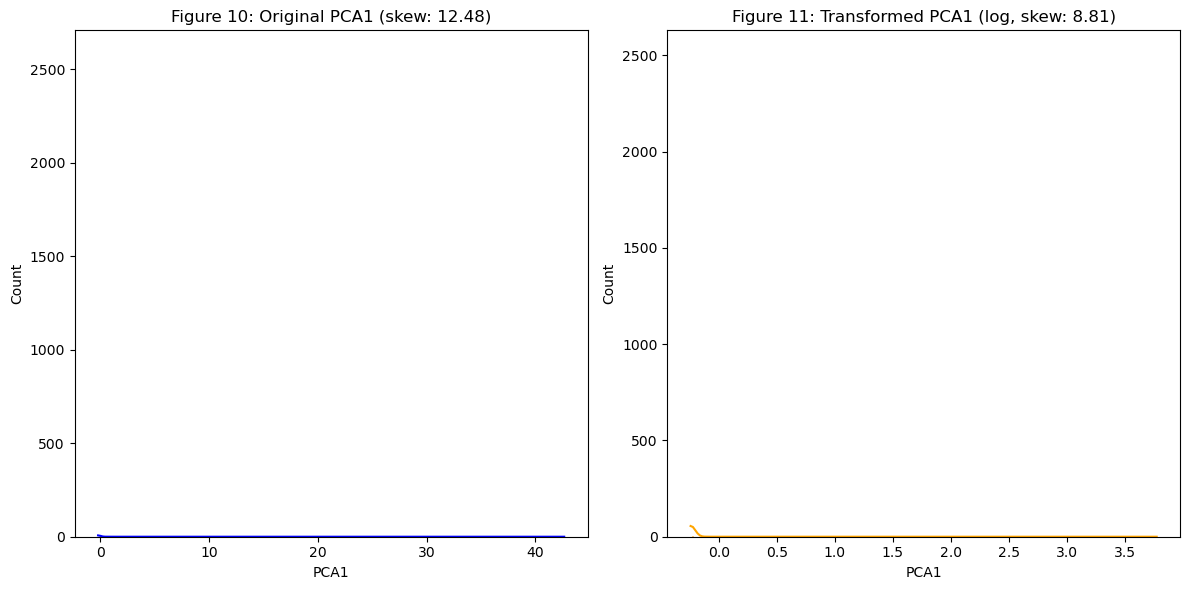

In [15]:
features_skewness = {
    'Temperature[C]': -0.62,
    'Humidity[%]': -2.46,
    'TVOC[ppb]': 6.78,
    'eCO2[ppm]': 12.46,
    'Raw H2': -2.91,
    'Raw Ethanol': -1.68,
    'Pressure[hPa]': -3.60,
    'Fire Alarm': -0.95,
    'PCA1': 12.48,
    'PCA2': 0.39
}

lower_skew_threshold = -4
upper_skew_threshold = 4

std_df_pca_trans = standardized_df_pca.copy(deep=True)

fig_num = 6

for feature, sk in features_skewness.items():
    if sk < lower_skew_threshold:
        transformed_feature = np.square(std_df_pca_trans[feature])
        transformation_type = 'squared'
    elif sk > upper_skew_threshold:
        transformed_feature = np.log1p(std_df_pca_trans[feature] + 0.0001)
        transformation_type = 'log'
    else:
        continue

    transformed_skew = skew(transformed_feature.dropna())

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(std_df_pca_trans[feature], kde=True, ax=ax[0], color='blue')
    ax[0].set_title(f'Figure {fig_num}: Original {feature} (skew: {sk:.2f})')
    sns.histplot(transformed_feature, kde=True, ax=ax[1], color='orange')
    ax[1].set_title(f'Figure {fig_num + 1}: Transformed {feature} ({transformation_type}, skew: {transformed_skew:.2f})')

    plt.tight_layout()
    plt.show()
    fig_num += 2  

To enhance the robustness of our model assessment and address the challenge of class imbalance, we have decided to implement stratified 10-fold cross-validation techniques. These techniques will play a crucial role in evaluating the performance of our model across diverse subsets of the data. Stratified cross-validation is particularly beneficial when dealing with class imbalance because it ensures that each fold maintains the same class label proportions as in the original dataset. This approach helps us obtain a more accurate and reliable assessment of our model's ability to generalize to unseen data.

In [16]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

We will now prepare the datasest for machine learning tasks, which results in several pairs of feature matrices (X) and target vectors (y). These pairs cover variations of the initial dataframe, including standardized and normalized versions, with or without Principal Component Analysis (PCA), and specific log transformations. By organizing the data in this structured manner, it becomes convenient to explore the impact of different preprocessing techniques on machine learning model performance, allowing for a systematic evaluation of various data configurations and transformations.

In [17]:
X_std_pca = standardized_df_pca.drop('Fire Alarm', axis=1) 
y_std_pca = standardized_df_pca['Fire Alarm']

X_std_pca_trans = std_df_pca_trans.drop('Fire Alarm', axis=1) 
y_std_pca_trans = std_df_pca_trans['Fire Alarm']

X_std = standardized_df.drop('Fire Alarm', axis=1) 
y_std = standardized_df['Fire Alarm']

X_df = dataframe.drop('Fire Alarm', axis=1) 
y_df = dataframe['Fire Alarm']

X_df_pca = dataframe_pca.drop('Fire Alarm', axis=1) 
y_df_pca = dataframe_pca['Fire Alarm']

X_norm = normalized_df.drop('Fire Alarm', axis=1) 
y_norm = normalized_df['Fire Alarm']

X_norm_pca = normalized_df_pca.drop('Fire Alarm', axis=1) 
y_norm_pca = normalized_df_pca['Fire Alarm']

datasets = {
    'std_pca_trans': (X_std_pca_trans, y_std_pca_trans),
    'std_pca': (X_std_pca, y_std_pca),
    'df_pca': (X_df_pca, y_df_pca),
    'norm_pca': (X_norm_pca, y_norm_pca),
    'df': (X_df, y_df),
    'norm': (X_norm, y_norm),
    'std': (X_std, y_std)
}

<h2>Data Modelling and Data Evaluation</h2>

This project phase is of utmost importance as it determines the most suitable model for our data prediction. We will systematically implement well-known algorithms and rigorously assess their performance to identify the most effective one. While this phase may be extensive, it plays a pivotal role in model selection.

It's crucial to note that, when evaluating each classifier for predicting the 'Fire Alarm' attribute on unseen data, we consider metrics beyond accuracy, providing a comprehensive comparison of classifiers.

<h3>CatBoost Classifier</h3>

The choice of the CatBoost classifier as our primary model for training and testing our datasets is well-founded, considering the characteristics of our data and the classifier's robust capabilities. CatBoost, based on a gradient boosting framework, builds decision trees sequentially to correct errors effectively, allowing it to handle complex relationships in the data. The built-in L2 regularization mitigates overfitting risks, while its symmetric tree structure makes it resilient to outliers. By optimizing learning rates, we can enhance model robustness and generalization. CatBoost's custom loss function and overfitting detector further contribute to its effectiveness.

To comprehensively evaluate our classifier, we intend to train and test it across all seven different datasets. This approach enables us to tailor the choice of classifier to each dataset's unique characteristics. Given CatBoost's versatile capabilities, we are optimistic about achieving excellent results when applying it to previously unseen data.

These are two well-defined helper functions designed for cross-validation and metric calculation in machine learning tasks.

The first function performs stratified K-Fold cross-validation (with K determined by the provided skf) and computes various classification metrics for evaluation. It iterates through the folds, fits the classifier to the training data, and evaluates it on the test data. Metrics calculated include AUC (Area Under the Receiver Operating Characteristic Curve), accuracy, precision, recall, F1-score, and confusion matrix. The ROC curve is also computed for each fold. Mean values of the computed metrics across all folds are returned.

In [18]:
def cross_validate_and_metrics(clf, X, y, skf):
    auc_scores, acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], [], []
    tprs = []
    all_true_labels = []
    all_pred_labels = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        clf.fit(X_train_fold, y_train_fold)
        y_pred = clf.predict(X_test_fold)
        y_pred_proba = clf.predict_proba(X_test_fold)[:, 1]
        
        all_true_labels.extend(y_test_fold)
        all_pred_labels.extend(y_pred)

        acc_scores.append(accuracy_score(y_test_fold, y_pred))
        prec_scores.append(precision_score(y_test_fold, y_pred))
        rec_scores.append(recall_score(y_test_fold, y_pred))
        f1_scores.append(f1_score(y_test_fold, y_pred))
        
        fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)

    return mean_fpr, mean_tpr, mean_auc, std_auc, np.mean(acc_scores), np.mean(prec_scores), np.mean(rec_scores), np.mean(f1_scores), conf_matrix

Similar to the first function, this one performs K-Fold cross-validation using the provided classifier. However, it focuses on different metrics and also calculates feature importances. Metrics computed include accuracy, precision, recall, F1-score, and AUC. Additionally, it calculates the mean feature importance across all folds. Mean values of the computed metrics and the mean feature importance are returned.

In [19]:
def cross_validate_and_metrics_diff(clf, X, y, skf):
    auc_scores, acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], [], []
    feature_importance_list = []

    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        clf.fit(X_train_fold, y_train_fold)
        y_pred = clf.predict(X_test_fold)
        y_pred_proba = clf.predict_proba(X_test_fold)[:, 1]
        
        acc_scores.append(accuracy_score(y_test_fold, y_pred))
        prec_scores.append(precision_score(y_test_fold, y_pred))
        rec_scores.append(recall_score(y_test_fold, y_pred))
        f1_scores.append(f1_score(y_test_fold, y_pred))

        fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
        auc_scores.append(auc(fpr, tpr))

        feature_importance_list.append(clf.feature_importances_)

    mean_feature_importance = np.mean(feature_importance_list, axis=0)
    return np.mean(acc_scores), np.mean(prec_scores), np.mean(rec_scores), np.mean(f1_scores), np.mean(auc_scores), mean_feature_importance

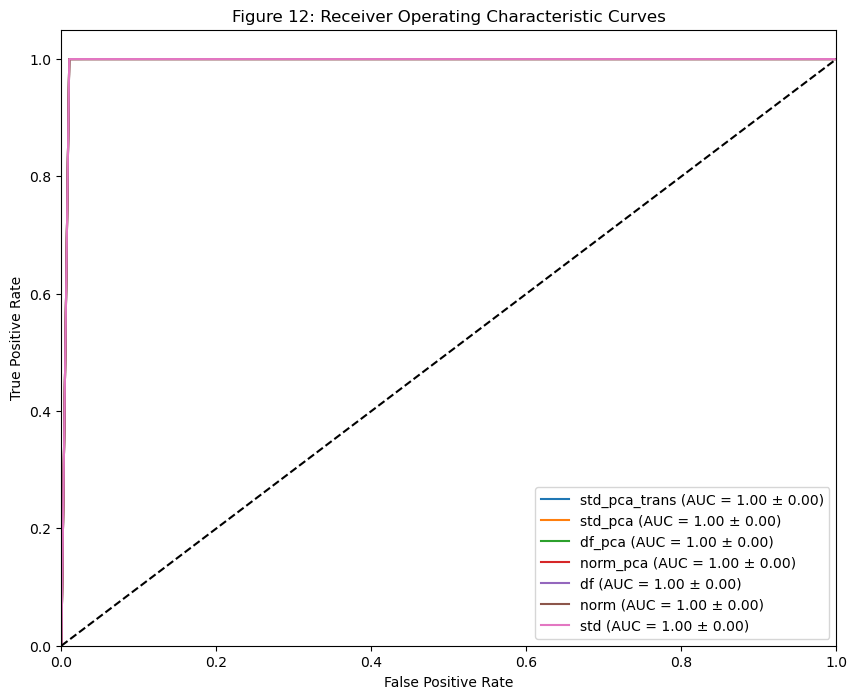

               Accuracy  Precision    Recall  F1 Score       AUC
std_pca_trans  0.999776   0.999777  0.999911  0.999844  0.999999
std_pca        0.999776   0.999777  0.999911  0.999844  0.999999
df_pca         0.999824   0.999844  0.999911  0.999877  0.999999
norm_pca       0.999792   0.999799  0.999911  0.999855  0.999999
df             0.999776   0.999777  0.999911  0.999844  0.999999
norm           0.999776   0.999777  0.999911  0.999844  0.999999
std            0.999776   0.999777  0.999911  0.999844  0.999999


In [20]:
evaluation_metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

plt.figure(figsize=(10, 8))

for name, (X, y) in datasets.items():
    
    catboost_clf = CatBoostClassifier(random_seed=42, verbose=False, early_stopping_rounds=10, l2_leaf_reg=10)
    mean_fpr, mean_tpr, mean_auc, std_auc, mean_acc, mean_prec, mean_rec, mean_f1, _ = cross_validate_and_metrics(catboost_clf, X, y, skf)
    
    evaluation_metrics.loc[name] = [mean_acc, mean_prec, mean_rec, mean_f1, mean_auc]
    
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 12: Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()

print(evaluation_metrics)

Across all seven datasets, our CatBoost classifier consistently demonstrates exceptional performance, achieving near-perfect accuracy scores on each dataset. What's particularly noteworthy is that these results remain quite consistent regardless of the preprocessing techniques applied to our raw data. This suggests several interesting insights:

- **Robust Model Performance:** CatBoost's reputation for robustness and its ability to handle noisy or unprocessed data effectively is reaffirmed by these results.

- **Sufficient Complexity:** It appears that the datasets and tasks at hand may not be sufficiently complex to necessitate extensive preprocessing. CatBoost's inherent capability to capture complex relationships in the data allows it to excel even with minimal preprocessing.

However, an intriguing finding emerges when comparing the 'df_pca' dataset to the preprocessed ones. 'df_pca' consistently exhibits higher performance metrics across the board, including accuracy, precision, and F1 score. One possible explanation for the slightly superior performance of 'df_pca' could be related to the specific characteristics of the dataset. It's conceivable that the 'df_pca' dataset possesses inherent features or patterns that align particularly well with the CatBoost algorithm's strengths. These patterns may simplify the learning task, making extensive preprocessing less necessary and allowing the classifier to achieve exceptional results.

Depending on the specific characteristics of the data, feature transformations like standardization or PCA may not always be beneficial. For instance, it might be the case that the transformations we deployed in the preprocessing phase introduced noise or altered the data's inherent structure, which leads to decreased performances. This explains why certain metrics that highlight the performance of the classifier over datasets like 'std' and 'std_pca' are slightly lower than for 'df_pca', for example. However, it might also be the case that the classifier overfits when trained and tested on the latter one.

While these results are promising, it's important to remain vigilant regarding overfitting. Before drawing definitive conclusions about the CatBoost classifier's performance, we will delve into the features that significantly influence the classifier's decisions during training. Since the 'df_pca' dataset shows the highest performance metrics, we will use it in our analysis. This analysis will provide valuable insights into the model's generalization performance and guide us in making informed decisions about our classifier's deployment.


In [44]:
catboost_clf = CatBoostClassifier(random_seed=42, verbose=False, early_stopping_rounds=10, l2_leaf_reg=10)
    
_, _, _, _, _, _, _, _, _ = cross_validate_and_metrics(catboost_clf, X_df_pca, y_df_pca, skf)

feature_importances = catboost_clf.feature_importances_

attribute_performance = {}
for i, attribute in enumerate(X_df_pca.columns[:-1]):
    performance = feature_importances[i]
    attribute_performance[attribute] = performance

sorted_attributes = sorted(attribute_performance.items(), key=lambda x: x[1], reverse=True)

print("Figure 13: Features importances:", '\n')

for attribute, performance in sorted_attributes:
    print(f"{attribute}: {performance:.2f}")

Figure 13: Features importances: 

Pressure[hPa]: 41.85
TVOC[ppb]: 20.91
PCA1: 8.41
Raw Ethanol: 5.88
Humidity[%]: 4.02
Temperature[C]: 3.42
Raw H2: 2.08
eCO2[ppm]: 0.46


Features importances serve as a measure of each attribute's significance within a machine learning model's decision-making process. A higher importance score indicates a more substantial influence on the model's predictions. For instance, in the provided list of feature importances, 'Pressure[hPa]' stands out with a score of 41.85, signifying it as the most critical predictor, closely followed by 'TVOC[ppb]' at 20.91. These scores offer valuable insights, since they help us gain a deeper understanding of the model's behaviour.

Upon closer examination, it becomes evident why 'Pressure[hPa]' holds such significant importance in the model's decision-making process, considering its critical role in our domain of study. However, this dominance of one feature may lead to over-reliance, potentially overshadowing the contributions of other features in determining fire alarm triggers. To explore this, we conduct an experiment by removing the 'Pressure[hPa]' feature from our dataset and training a new CatBoost classifier. Subsequently, we assess the model's performance through evaluation metrics and reevaluate the significance of each feature.

In [22]:
X_std_pca_d = X_std_pca.drop("Pressure[hPa]", axis=1)

X_std_pca_trans_d = X_std_pca_trans.drop("Pressure[hPa]", axis=1)

X_std_d = X_std.drop("Pressure[hPa]", axis=1)

X_df_d = X_df.drop("Pressure[hPa]", axis=1)

X_df_pca_d = X_df_pca.drop("Pressure[hPa]", axis=1)

X_norm_d = X_norm.drop("Pressure[hPa]", axis=1)

X_norm_pca_d = X_norm_pca.drop("Pressure[hPa]", axis=1) 

datasets_d = {
    'std_pca_trans': (X_std_pca_trans_d, y_std_pca_trans),
    'std_pca': (X_std_pca_d, y_std_pca),
    'df_pca': (X_df_pca_d, y_df_pca),
    'norm_pca': (X_norm_pca_d, y_norm_pca),
    'df': (X_df_d, y_df),
    'norm': (X_norm_d, y_norm),
    'std': (X_std_d, y_std)
}

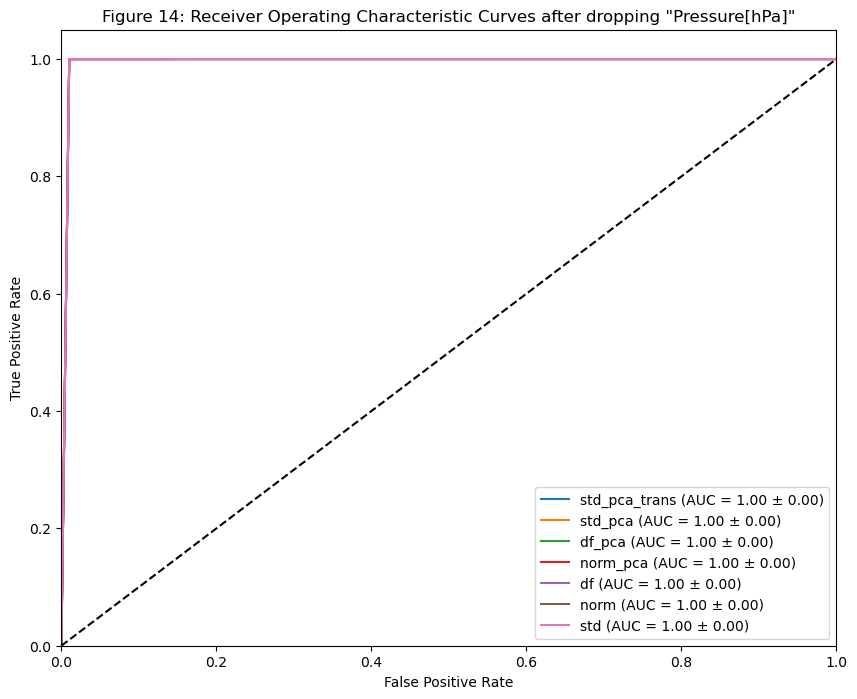

               Accuracy  Precision    Recall  F1 Score       AUC
std_pca_trans  0.999745   0.999754  0.999888  0.999821  0.999992
std_pca        0.999745   0.999754  0.999888  0.999821  0.999992
df_pca         0.999665   0.999687  0.999844  0.999765  0.999992
norm_pca       0.999745   0.999732  0.999911  0.999821  0.999990
df             0.999713   0.999710  0.999888  0.999799  0.999991
norm           0.999713   0.999710  0.999888  0.999799  0.999991
std            0.999713   0.999710  0.999888  0.999799  0.999991


In [45]:
evaluation_metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

plt.figure(figsize=(10, 8))

for name, (X, y) in datasets_d.items():
    
    catboost_clf = CatBoostClassifier(random_seed=42, verbose=False, early_stopping_rounds=10, l2_leaf_reg=10)
    mean_fpr, mean_tpr, mean_auc, std_auc, mean_acc, mean_prec, mean_rec, mean_f1, _ = cross_validate_and_metrics(catboost_clf, X, y, skf)
    
    evaluation_metrics.loc[name] = [mean_acc, mean_prec, mean_rec, mean_f1, mean_auc]
    
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 14: Receiver Operating Characteristic Curves after dropping "Pressure[hPa]"')
plt.legend(loc='lower right')
plt.show()

print(evaluation_metrics)

In [47]:
catboost_clf = CatBoostClassifier(random_seed=42, verbose=False, early_stopping_rounds=10, l2_leaf_reg=10)

_, _, _, _, _, mean_feature_importances = cross_validate_and_metrics_diff(catboost_clf, X_df_pca_d, y_df_pca, skf)

attribute_performance = {X_df_pca_d.columns[i]: importance for i, importance in enumerate(mean_feature_importances)}
sorted_attributes = sorted(attribute_performance.items(), key=lambda x: x[1], reverse=True)

print(" Figure 15: Feature importances after dropping 'Pressure[hPa]'", '\n')
for attribute, performance in sorted_attributes:
    print(f"{attribute}: {performance:.2f}")

 Figure 15: Feature importances after dropping 'Pressure[hPa]' 

TVOC[ppb]: 26.70
Raw Ethanol: 22.95
PCA1: 14.94
Humidity[%]: 12.58
PCA2: 8.40
Raw H2: 6.14
Temperature[C]: 6.03
eCO2[ppm]: 2.27


The removal of the "Pressure" feature has little impact on performance, suggesting its non-crucial role in classification tasks or the presence of other informative features. The classifier's consistency across various preprocessing techniques underscores its robustness, indicating strong underlying data patterns independent of the preprocessing pipeline. Although minor metric variations are observed, the "df_pca" dataset no longer leads in performance after "Pressure" removal, suggesting its role in classification, possibly due to interactions with other features in the dataset.

In terms of feature importance, 'TVOC[ppb]' emerges as the most influential feature, followed closely by 'Raw Ethanol' and 'Humidity[%]'. Surprisingly, the absence of the 'Pressure[hPa]' feature doesn't impact the model's performance, suggesting that other attributes effectively determine fire alarm triggers. This underscores the model's adaptability and reliability.

Now, with the 'std_pca' data set, we aim to deploy an error analysis to gain deeper insights into the classifier's behavior. To do so, we will use a confusion matrix, a valuable tool for assessing a classifier's performance by revealing true positives, true negatives, false positives, and false negatives. Given the exceptionally high performance metrics we've already observed, we expect the confusion matrix to reflect only a few misclassified data objects, reaffirming the robustness and reliability of our CatBoost classifier on the 'std_pca' data set.

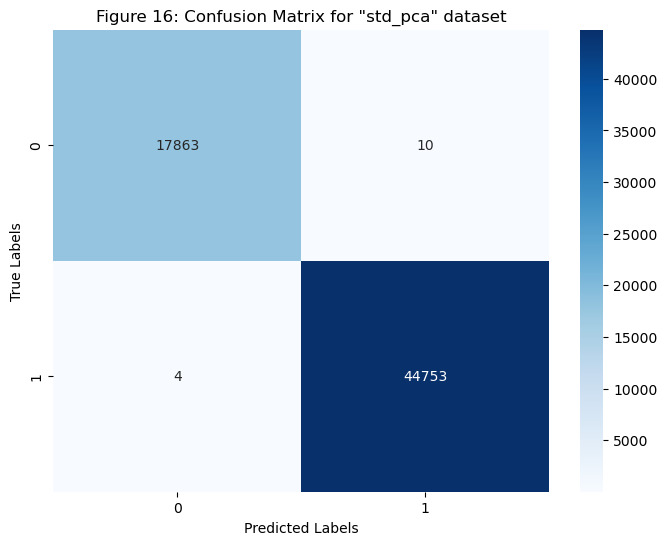

In [48]:
X, y = datasets['std_pca']

catboost_clf = CatBoostClassifier(random_seed=42, verbose=False, early_stopping_rounds=10, l2_leaf_reg=10)

_, _, _, _, _, _, _, _, conf_matrix_std_pca_trans = cross_validate_and_metrics(catboost_clf, X, y, skf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_std_pca_trans, annot=True, fmt='g', cmap='Blues')
plt.title('Figure 16: Confusion Matrix for "std_pca" dataset')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix provided supports the hypothesis that the CatBoost classifier is performing exceptionally well. With 17,863 true negatives and 44,753 true positives, the classifier has exhibited a remarkable ability to correctly classify both the negative and positive classes. The number of false negatives and false positives is minimal, with only 4 and 10 instances respectively. This indicates an exceedingly high level of accuracy and suggests that the classifier has successfully captured the underlying patterns in the data. The near-absence of misclassifications reinforces the robustness of the model and its reliability in making predictions on this particular data set.

However, the need for checking overfitting is high when evaluating every classifier. Thus, we will deploy a learning curve to show how the classifier's performance evolves with the increasing size of the training dataset. Learning curves are valuable tools for assessing a model's bias and variance by visualizing the relationship between the training set size and the model's performance metrics. By plotting these curves, we can identify whether the model is underfitting or overfitting the data. This analysis helps us determine if collecting more data would be beneficial and if the model's performance can be further improved.

Mean Training Score: 0.9999
Mean Validation Score: 0.8053
Mean Standard deviation of Validation Score: 0.0116


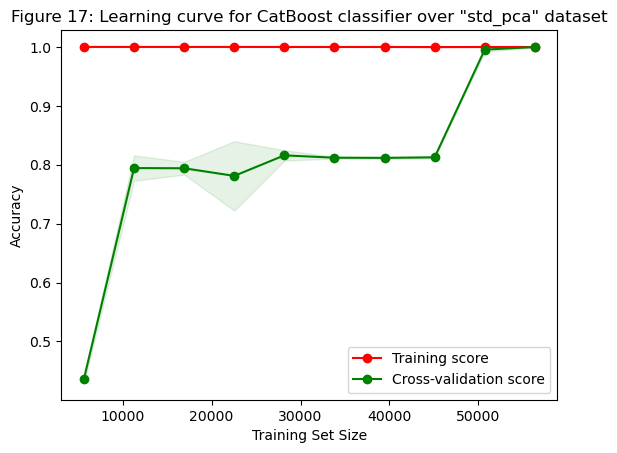

In [49]:
catboost_clf = CatBoostClassifier(random_seed=42, verbose=False, early_stopping_rounds=10, l2_leaf_reg=10)

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, validation_scores = learning_curve(
    catboost_clf, X_std_pca, y_std_pca, train_sizes=train_sizes, cv=skf, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

print(f"Mean Training Score: {np.mean(train_mean):.4f}")
print(f"Mean Validation Score: {np.mean(validation_mean):.4f}")
print(f"Mean Standard deviation of Validation Score: {np.mean(validation_std):.4f}")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Figure 17: Learning curve for CatBoost classifier over "std_pca" dataset')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

The learning curve for the CatBoost classifier trained on the 'std_pca' dataset reveals valuable insights into its performance. The exceptionally high mean training score of 0.9999 suggests that the classifier effectively captures the underlying patterns within the training data. However, the mean validation score of 0.8053, although still indicative of good predictive performance, presents a notable gap compared to the training score.

This discrepancy raises the possibility of overfitting, where the model excels on familiar data but struggles to generalize to new, unseen data. The cross-validation score remains relatively stable with increasing training set sizes, showing a slight upward trend, which is promising and indicates the model benefits from more data.

The abrupt increase in the cross-validation score towards the end of the learning curve could be attributed to several factors, including data characteristics, model capacity, random variation, or even data leakage.

The plateau observed at the validation curve's end implies that further increases in training data may not significantly enhance model performance. This suggests that the model has effectively learned generalizable patterns, and additional data offers diminishing returns.

The minimal standard deviation in cross-validation scores is a positive sign, indicating consistent model performance across different data subsets. This consistency reflects the model's stable accuracy, independent of specific training set samples. 

Our thorough evaluation suggests that the risk of overfitting has been somehow reduced, although it cannot be completely ruled out as indicated by our learning curve analysis. Our confidence is supported by several measures: we've addressed class imbalance using stratified 10-fold cross-validation, employed L2 regularization within our classifier to prevent overfitting, and been cautious about not over-relying on the most influential features. Moreover, the incorporation of early stopping mechanisms has further safeguarded against overfitting during the training phase.

Nevertheless, to deepen our understanding of the underlying classification problem, we intend to explore alternative classifiers. This exploration will help us determine whether the classification task is indeed relatively straightforward or if there are nuances that need further investigation, ensuring the robustness of our conclusions.

<h3>Neural Networks Classifier</h3>

The Multilayer Perceptron (MLP) classifier is a versatile and powerful neural network model used for various machine learning tasks, including classification. It consists of multiple layers of interconnected neurons, allowing it to capture complex patterns in data. When it comes to classification, MLPs are known for their ability to handle nonlinear relationships in the data, making them suitable for a wide range of applications.

Stratified K-Fold cross-validation is employed to evaluate the MLP classifier's performance, similar as in the annalysis of the previous classifier. The dataset is split into ten stratified folds, ensuring that class distribution is preserved in each fold. To accelerate the process, parallel processing is utilized to run cross-validation and performance metric calculations concurrently for different datasets. This approach significantly reduces the time required to assess the MLP classifier's accuracy, precision, recall, F1 Score, and AUC on various preprocessing pipelines, making the analysis more efficient and scalable.

In this analysis, we have high expectations for the MLP classifier's performance after standardizing the dataset. By standardizing the data, we aim to enhance the model's ability to learn and generalize from the input data. We anticipate that the MLP classifier will demonstrate strong performance, strengthening its capacity to uncover hidden patterns in the standardized dataset, but also in others.

It is important to note that we employed pre-pruning methods in our MLP classifier to mitigate the risk of overfitting. These methods involve setting specific hyperparameters of the classifier, such as 'early_stopping,' 'validation_fraction,' and 'n_iter_no_change,' with the primary objective of promoting generalization and preventing the model from fitting noise in the training data. Note that we use the default value for the rest of the parameters.

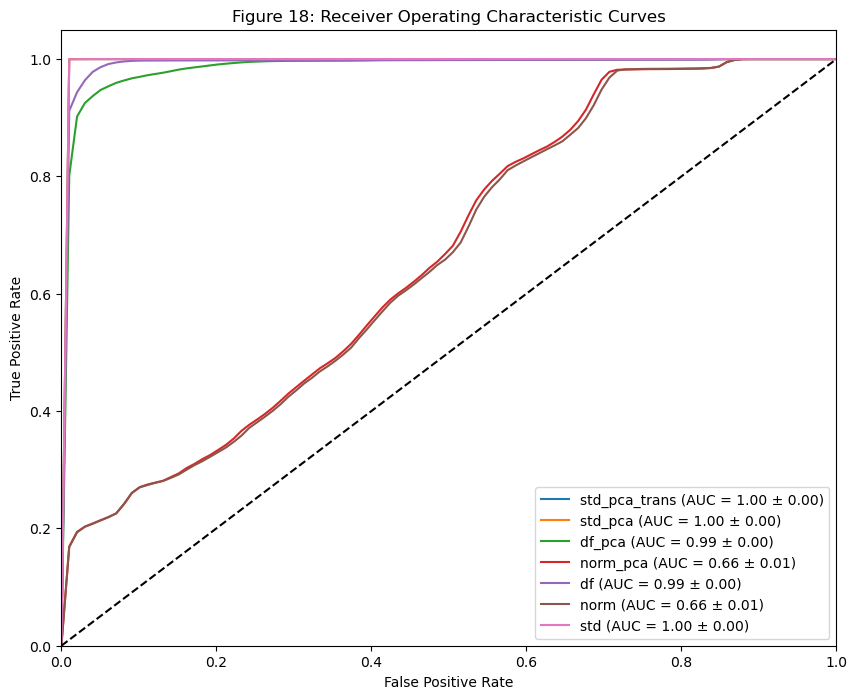

               Accuracy  Precision    Recall  F1 Score       AUC
std_pca_trans  0.998531   0.998571  0.999374  0.998973  0.999961
std_pca        0.998531   0.998571  0.999374  0.998973  0.999961
df_pca         0.950152   0.968971  0.961101  0.964970  0.986887
norm_pca       0.753377   0.743673  0.999352  0.852759  0.662612
df             0.978988   0.978498  0.992448  0.985409  0.994286
norm           0.753042   0.743325  0.999598  0.852620  0.658594
std            0.997940   0.997706  0.999419  0.998561  0.999834


In [50]:
def evaluate_mlp_classifier(name, X, y, skf):
    mlp_clf =  MLPClassifier( random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
    return cross_validate_and_metrics(mlp_clf, X, y, skf)

evaluation_metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

plt.figure(figsize=(10, 8))

parallel_results = Parallel(n_jobs=-1)(
    delayed(evaluate_mlp_classifier)(name, X, y, skf)
    for name, (X, y) in datasets.items()
)

for i, (name, dataset) in enumerate(datasets.items()):
    
    mean_fpr, mean_tpr, mean_auc, std_auc, mean_acc, mean_prec, mean_rec, mean_f1, _ = parallel_results[i]
    
    evaluation_metrics.loc[name] = [mean_acc, mean_prec, mean_rec, mean_f1, mean_auc]
    
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 18: Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()

print(evaluation_metrics)

The performance metrics of the MLP classifier exhibit variations across different datasets, indicating that the choice of data set preprocessing and features can significantly impact the classifier's effectiveness. Notably, datasets such as 'std_pca' and 'std' achieve remarkably high accuracy, precision, recall, F1 Score, and AUC scores, suggesting that standardization and PCA transformation play a crucial role in enhancing the classifier's performance. 

On the other hand, datasets 'norm_pca', 'df_pca', and 'norm' exhibit lower performance metrics, particularly in terms of accuracy, precision, and AUC. This may be attributed to the normalization process, which may not have had the same beneficial impact as standardization in these cases. Additionally, PCA transformation in these datasets may not have effectively captured relevant variance in the data or might have introduced noise, leading to suboptimal performance.

It's worth noting that 'df' dataset, which represents the raw data without any preprocessing, achieves good performance, indicating that the classifier can still effectively learn and separate classes from the original features. However, it falls slightly short of the performance achieved by the standardized datasets.

To mitigate the risk of overfitting, we plan to analyze a learning curve using the 'std_pca' dataset, similar to our approach with the CatBoost classifier. This learning curve analysis will provide insights into how the performance of the MLP classifier evolves as we increase the size of the training data set.

Mean Training Score: 0.9983
Mean Validation Score: 0.8009
Mean Standard deviation of Validation Score: 0.0077


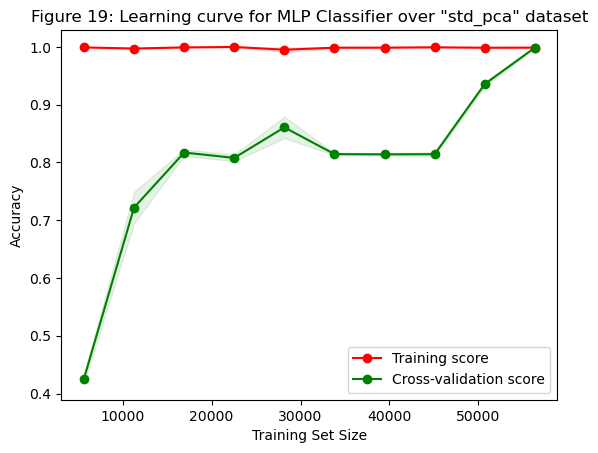

In [51]:
mlp_clf =  MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, validation_scores = learning_curve(
    mlp_clf, X_std_pca, y_std_pca, train_sizes=train_sizes, cv=skf, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

print(f"Mean Training Score: {np.mean(train_mean):.4f}")
print(f"Mean Validation Score: {np.mean(validation_mean):.4f}")
print(f"Mean Standard deviation of Validation Score: {np.mean(validation_std):.4f}")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Figure 19: Learning curve for MLP Classifier over "std_pca" dataset')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

The learning curve presented for the MLP Classifier on the 'std_pca' dataset indicates a high training accuracy close to 1 (or 99.83%), while the cross-validation accuracy is somewhat lower at approximately 0.8009. This discrepancy suggests that the model is potentially overfitting to the training data, as evidenced by its near-perfect performance on the training examples contrasted with a substantially lower performance on the validation set.

Furthermore, the relatively small standard deviation in validation scores (0.0077) across different sizes of the training set suggests that the validation scores are consistent. 

A key observation from the curve is the initial sharp increase in cross-validation accuracy with an increase in the training set size, which then levels off and even dips slightly as more training data is added. This could mean that beyond a certain point, adding more data does not significantly contribute to learning better generalizable patterns. However, similar to the previous classifier, the spike at the end of the learning curve can be due to several factors, like: data characteristics, model capacity, random variation or even data leakage.

Another point to note is the plateau of the training score, which remains constant regardless of the increase in training data. This plateauing at a high accuracy level suggests that the model has enough capacity to nearly memorize the training data, which is a hint to overfitting.

Similar to our previous classifier, we will perform an error analysis to gain insights into the types of errors made by the MLP classifier when tested on unseen data from the 'std_pca' data set. To do this, we will utilize a confusion matrix.

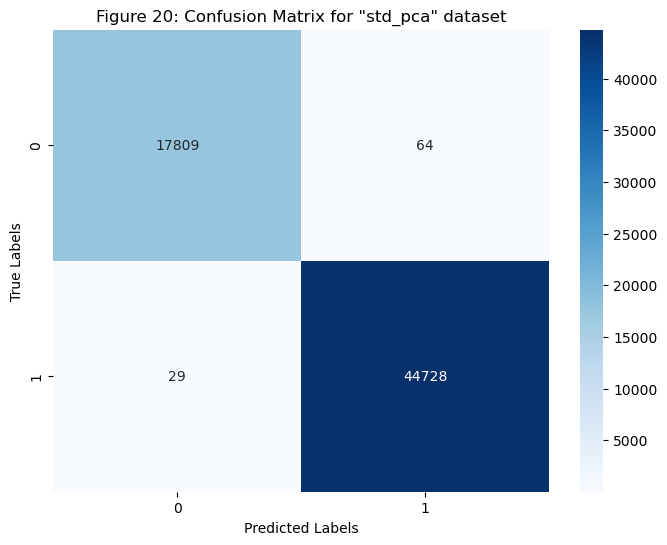

In [52]:
X, y= datasets['std_pca']

mlp_clf =  MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

_, _, _, _, _, _, _, _, conf_matrix_std_pca_trans = cross_validate_and_metrics(mlp_clf, X, y, skf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_std_pca_trans, annot=True, fmt='g', cmap='Blues')
plt.title('Figure 20: Confusion Matrix for "std_pca" dataset')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix obtained for the MLP classifier on the 'std_pca' dataset exhibits some similarities to the one generated for the CatBoost classifier. Both classifiers tend to make more false positive mistakes (Type I errors) than false negative misclassifications (Type II errors). This similarity in their error patterns aligns with our earlier observation of their high performance metrics, where they achieved impressive accuracy and precision scores.

In addition, the observed differences in the scale of errors between the MLP and CatBoost classifiers were expected due to their distinct learning mechanisms. However, the shared preference for minimizing false negatives is particularly advantageous for our specific application, where the consequences of failing to detect a potential fire hazard (false negatives) are more significant than occasionally classifying a normal situation as a fire hazard (false positives). This emphasis on minimizing false negatives aligns well with our safety-focused objective, ensuring a robust fire detection system that prioritizes early and accurate warnings.

In addition, before we proceed with the next phase of our project report, which involves a detailed analysis of the results we've observed thus far, we plan to train a Dummy Classifier. This classifier assigns all instances to the majority class and serves as a benchmark for comparison with other classifiers. It's worth noting that, in the case of our DummyClassifier predicting the most frequent class, the use of ROC curve and AUC is not applicable. This is because the Dummy Classifier does not provide probability estimates, thus preventing threshold variation. Instead, we will focus on printing and comparing other relevant metrics that will allow us to evaluate its performance against other classifiers.

Dummy Classifier Metrics:
Accuracy: 0.71
Precision: 0.71
Recall: 1.00
F1 Score: 0.83


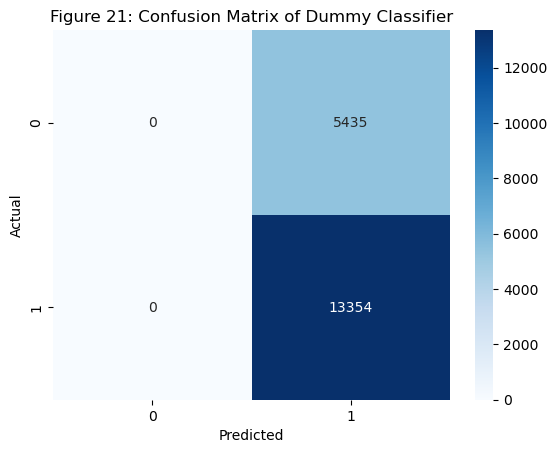

In [53]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train_df, y_train_df)

y_pred_dummy = dummy_clf.predict(X_test_df)

accuracy_dummy = accuracy_score(y_test_df, y_pred_dummy)
precision_dummy = precision_score(y_test_df, y_pred_dummy)
recall_dummy = recall_score(y_test_df, y_pred_dummy)
f1_dummy = f1_score(y_test_df, y_pred_dummy)

print("Dummy Classifier Metrics:")
print(f"Accuracy: {accuracy_dummy:.2f}")
print(f"Precision: {precision_dummy:.2f}")
print(f"Recall: {recall_dummy:.2f}")
print(f"F1 Score: {f1_dummy:.2f}")

conf_matrix_dummy = confusion_matrix(y_test_df, y_pred_dummy)

sns.heatmap(conf_matrix_dummy, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 21: Confusion Matrix of Dummy Classifier")
plt.show()

This results are indicative of a highly imbalanced dataset where the majority class is the positive class. The Dummy Classifier's 'strategy' to always predict the most frequent class has led to these metrics. It's important to note that while the accuracy might seem acceptable, in reality, the model has no predictive power and is not better than random guessing for the negative class. The high recall is also not useful here because it comes at the expense of identifying any negatives correctly.

Hence, while the Dummy Classifier serves as a baseline, its apparent 'success' as indicated by the recall and F1 score is due to its strategy of always predicting the majority class, and it fails to provide any meaningful insights or predictions for the negative class. Thus, these results highlight the importance of examining a range of performance metrics and not relying solely on accuracy, especially in the context of imbalanced datasets.

In the upcoming analysis, we intend to conduct a statistical significance test to further investigate the observed performance difference between the CatBoost and MLP classifiers. To frame this test, we will define the null hypothesis (H0) and the alternative hypothesis (H1). The null hypothesis, in this context, indicates that there is no significant difference in error proportions between the two classifiers on the dataset in question. Conversely, the alternative hypothesis sugests that a significant difference does exist in their error proportions. By conducting this test, we aim to determine if the observed performance gap between the classifiers is statistically significant or if it could have occurred by random chance. 

In [32]:
catboost_clf = CatBoostClassifier(random_seed=42, verbose=False, early_stopping_rounds=10, l2_leaf_reg=10)

mlp_clf = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

y_true_all = []
y_pred_catboost_all = []
y_pred_mlp_all = []

for train_index, test_index in skf.split(X_std_pca, y_std_pca):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    catboost_clf.fit(X_train, y_train)
    y_pred_catboost = catboost_clf.predict(X_test)
    
    mlp_clf.fit(X_train, y_train)
    y_pred_mlp = mlp_clf.predict(X_test)
    
    y_true_all.extend(y_test)
    y_pred_catboost_all.extend(y_pred_catboost)
    y_pred_mlp_all.extend(y_pred_mlp)

Statistic: 65.419, p-value: 0.000
Different proportions of errors (reject H0)


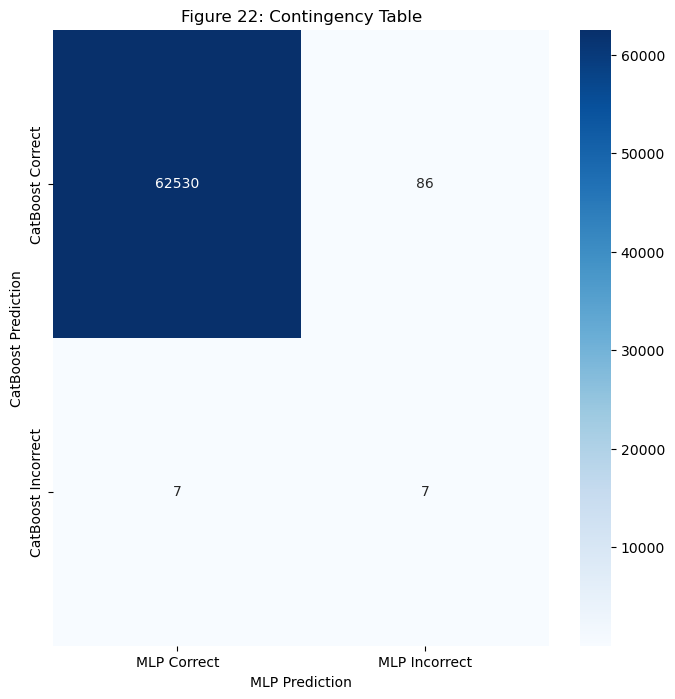

In [55]:
contingency_table = np.zeros((2, 2), dtype=int)

for true_val, catboost_pred, mlp_pred in zip(y_true_all, y_pred_catboost_all, y_pred_mlp_all):
    if catboost_pred == true_val and mlp_pred == true_val:
        contingency_table[0, 0] += 1  # Both correct
    elif catboost_pred == true_val and mlp_pred != true_val:
        contingency_table[0, 1] += 1  # Only CatBoost correct
    elif catboost_pred != true_val and mlp_pred == true_val:
        contingency_table[1, 0] += 1  # Only MLP correct
    else:
        contingency_table[1, 1] += 1  # Both incorrect

result = mcnemar(contingency_table, exact=False, correction=True)

print(f"Statistic: {result.statistic:.3f}, p-value: {result.pvalue:.3f}")
if result.pvalue < 0.05:
    print("Different proportions of errors (reject H0)")
else:
    print("No different proportions of errors (fail to reject H0)")

plt.figure(figsize=(8, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['MLP Correct', 'MLP Incorrect'], 
            yticklabels=['CatBoost Correct', 'CatBoost Incorrect'])
plt.title('Figure 22: Contingency Table')
plt.xlabel('MLP Prediction')
plt.ylabel('CatBoost Prediction')
plt.show()


The statistic value in the McNemar test represents the chi-squared statistic based on the difference in the number of instances where one classifier is correct and the other is not. The magnitude of the statistic value indicates the degree of difference between the classifiers. In our case, the statistic value is 65.419, which is relatively large. This suggests a greater difference in performance between the two classifiers being compared. Nevertheless, the significance of the statistic value is evaluated in conjunction with the p-value. In this case, the p-value is extremely low (0.000), suggesting a significant difference in performance. Hence, we reject the null hypothesis and conclude that one classifier (the CatBoost classifier) consistently outperforms the other (the MLP classifier). 

<h2>Data Interpretation</h2>

For a more comprehensive analysis of the classification problem, please refer to the Project Report.